In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
def helper_remove_b(text):
    if(text[:1] == 'b'):
        text = text[1:]
    return text

def helper_regex(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'b\'', '', text)
    text = re.sub(r'b\" ', '', text)
    text = re.sub("\$", "", text)
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    text = re.sub("@\S+", "", text)
    
    text = re.sub(r'[^\x00-\x7f]',r'', text)  
    text = text.translate({ord(i): None for i in '\\'})
    return text

def stop_words(text):
    nltk.download("stopwords")
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

def encode_decode(text):
    encode = text.encode(encoding="ascii", errors="ignore")
    decode = encode.decode()
    clean_text = " ".join([word for word in decode.split()])
    return clean_text

def remove_punctuation(text):
    punct = set(string.punctuation) 
    text = "".join([ch for ch in text if ch not in punct])
    return text


def lemm_stem(text):
    stemmer = PorterStemmer()
    text1 = ""
    for word in text:
        text1 += stemmer.stem(word)
    
    text2 = ""
    lemmatizer = WordNetLemmatizer()
    for word in text1:
        text2 += lemmatizer.lemmatize(word)
    
    return text2

def clean_text_full_power(text):
    text = helper_remove_b(text)
    text = helper_regex(text)
    text = stop_words(text)
    text = encode_decode(text)
    text = remove_punctuation(text)
    #text = lemm_stem(text)
    return text

In [3]:
df = pd.read_csv(r'LGBTQ.csv')
data = df[['tweet_text']].copy()
my_data = pd.DataFrame(data.iloc[1::2])

In [4]:
my_data = my_data.reset_index()

In [5]:
my_data = my_data.drop('index', axis=1)

In [6]:
my_data.head()

,tweet_text
0,b'It\xe2\x80\x99s always a great weekend when ...
1,"b""To our #UK-based friends and customers, here..."
2,b'Just a reminder: It was not trump nor his p...
3,b'Release Blitz: Concussion and Contentment by...
4,"b""Outrage at the @thetimes article about #Ston..."


In [7]:
clean_text_full_power(my_data['tweet_text'][10])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Fun long stream Gonna deep thinkin scheming Fun stuff works coulrophilia Clowngirl transgender LGBTQ ENVTuber VTuber Twitch GirlStreamer'

In [8]:
clean_data = pd.DataFrame(my_data['tweet_text'].apply(lambda a: clean_text_full_power(a)))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[

In [9]:
clean_data

,tweet_text
0,Itxe2x80x99s always great weekend boheme subda...
1,To UKbased friends customers important message...
2,Just reminder It trump people responsible rapi...
3,Release Blitz Concussion Contentment Liz Farai...
4,Outrage article Stonewall veryinterestingxf0x9...
...,...
95,Love tshirt marvel LGBTQ
96,We harassed intimidated back closet LGBTQ Mond...
97,xf0x9fx8cx9f M O N D A Y xe2x8fxb0 9th August ...
98,WIN WIN WINxf0x9fx8fx86 Somewhere hidden pride...


In [10]:
def clean(text):
    text = helper_remove_b(text)
    text = helper_regex(text)
    text = encode_decode(text)
    return text

In [11]:
tweet_data = pd.DataFrame(my_data['tweet_text'].apply(lambda a: clean(a)))

In [12]:
tweet_data.columns = ['tweet_text']
clean_data.columns = ['clean_text']

In [13]:
final_data = tweet_data.join(clean_data)

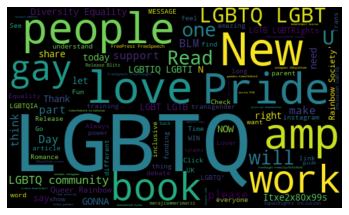

In [23]:
# Wordcloud plotting. Wordcloud was actually used to see the most popular word to make the image logo for our Project. 
allWords = ' '. join( [twts for twts in final_data['tweet_text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [15]:
final_data

,tweet_text,clean_text
0,'Itxe2x80x99s always a great weekend when bohe...,Itxe2x80x99s always great weekend boheme subda...
1,"""To our UK-based friends and customers, here i...",To UKbased friends customers important message...
2,'Just a reminder: It was not trump nor his peo...,Just reminder It trump people responsible rapi...
3,'Release Blitz: Concussion and Contentment by ...,Release Blitz Concussion Contentment Liz Farai...
4,"""Outrage at the article about Stonewall is ver...",Outrage article Stonewall veryinterestingxf0x9...
...,...,...
95,'Love this tshirt from marvel LGBTQ,Love tshirt marvel LGBTQ
96,'We will not be harassed or intimidated back i...,We harassed intimidated back closet LGBTQ Mond...
97,"""xf0x9fx8cx9f M O N D A Y xe2x8fxb0 9th August...",xf0x9fx8cx9f M O N D A Y xe2x8fxb0 9th August ...
98,"'WIN, WIN, WINxf0x9fx8fx86 Somewhere hidden in...",WIN WIN WINxf0x9fx8fx86 Somewhere hidden pride...


In [16]:
text_data = final_data

In [17]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [18]:
text_data['Subjectivity'] = text_data['clean_text'].apply(getSubjectivity)
text_data['Polarity'] = text_data['clean_text'].apply(getPolarity)

In [19]:
text_data


,tweet_text,clean_text,Subjectivity,Polarity
0,'Itxe2x80x99s always a great weekend when bohe...,Itxe2x80x99s always great weekend boheme subda...,0.750000,0.800000
1,"""To our UK-based friends and customers, here i...",To UKbased friends customers important message...,1.000000,0.400000
2,'Just a reminder: It was not trump nor his peo...,Just reminder It trump people responsible rapi...,0.275000,0.100000
3,'Release Blitz: Concussion and Contentment by ...,Release Blitz Concussion Contentment Liz Farai...,0.000000,0.000000
4,"""Outrage at the article about Stonewall is ver...",Outrage article Stonewall veryinterestingxf0x9...,0.066667,0.000000
...,...,...,...,...
95,'Love this tshirt from marvel LGBTQ,Love tshirt marvel LGBTQ,0.600000,0.500000
96,'We will not be harassed or intimidated back i...,We harassed intimidated back closet LGBTQ Mond...,0.000000,0.000000
97,"""xf0x9fx8cx9f M O N D A Y xe2x8fxb0 9th August...",xf0x9fx8cx9f M O N D A Y xe2x8fxb0 9th August ...,0.500000,0.000000
98,"'WIN, WIN, WINxf0x9fx8fx86 Somewhere hidden in...",WIN WIN WINxf0x9fx8fx86 Somewhere hidden pride...,0.377778,0.477778


In [20]:
#compute the -ve, neutral or positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
text_data['Analysis'] = text_data['Polarity'].apply(getAnalysis)
text_data

,tweet_text,clean_text,Subjectivity,Polarity,Analysis
0,'Itxe2x80x99s always a great weekend when bohe...,Itxe2x80x99s always great weekend boheme subda...,0.750000,0.800000,Positive
1,"""To our UK-based friends and customers, here i...",To UKbased friends customers important message...,1.000000,0.400000,Positive
2,'Just a reminder: It was not trump nor his peo...,Just reminder It trump people responsible rapi...,0.275000,0.100000,Positive
3,'Release Blitz: Concussion and Contentment by ...,Release Blitz Concussion Contentment Liz Farai...,0.000000,0.000000,Neutral
4,"""Outrage at the article about Stonewall is ver...",Outrage article Stonewall veryinterestingxf0x9...,0.066667,0.000000,Neutral
...,...,...,...,...,...
95,'Love this tshirt from marvel LGBTQ,Love tshirt marvel LGBTQ,0.600000,0.500000,Positive
96,'We will not be harassed or intimidated back i...,We harassed intimidated back closet LGBTQ Mond...,0.000000,0.000000,Neutral
97,"""xf0x9fx8cx9f M O N D A Y xe2x8fxb0 9th August...",xf0x9fx8cx9f M O N D A Y xe2x8fxb0 9th August ...,0.500000,0.000000,Neutral
98,"'WIN, WIN, WINxf0x9fx8fx86 Somewhere hidden in...",WIN WIN WINxf0x9fx8fx86 Somewhere hidden pride...,0.377778,0.477778,Positive


In [21]:
positive_tweets = text_data[text_data['Analysis'] == 'Positive']

In [22]:
positive_tweets.to_csv('finallgbtmodified.csv')